## The Problem With Maps

Maps have been such a mainstay of our lives for so long now that it's hard to imagine just how complex it is to create one. Keep in mind though, the earth is a 3-dimensional spherical object, and until we reach a point where some type of Star Wars-style, 3-dimensional holographic image is available, and easily portable, we'll be stuck with the problem of "projecting" the globe onto a 2-dimensional surface. What this means is that every map you've ever looked at was an estimation of the real world. In other words, every map you've ever used was flawed in some way, and the decision to use a particular "projection" was always met with a careful analysis of the trade-offs associated with each one. With that in mind, it's easy to understand why the simple task of displaying a map becomes a cost/benefit analysis of the different projection methods.

### What is a Map Projection?

You've now come across the term "projection" at least 3 different times in the last paragraph, so you may be asking yourself "what is a projection?" Well, before I answer that question, let's run through a quick thought experiment to understand the problem of map projection a bit more intuitively. 

Imagine taking an orange and drawing a map of the world on its surface. Then, take the peel of that orange and try to flatten it out so that you have a perfectly flat map of the world. The problem that you're going to run into is that the peel cannot be flattened without ripping and leaving gaps between different areas of the map. Now, to solve the problem of ripping, we could instead do the same trick as before, but this time with a balloon instead of an orange peel. The problem then becomes, in the areas where there were rips before, now those areas have become stretched and distorted. In other words, the areas furthest from the center of the balloon have become substantially stretched, while those towards the center have remained relatively unchanged. 

You can think of the balloon approach that we just discussed as an analogy for a map projection. In other words, a map projection is a method for flattening 3D objects. More specifically, a [map projection][1] is a mathematical equation for transforming points in a 3-dimensional space into coordinates on a 2-dimensional surface.

It should now be a bit easier to see that the problem of "projecting" the world onto a flat surface is really a question of choosing how best to distort a map given a specific purpose for its use. As an example, the inventor of the mercator projection (seen below), the most popular version of the world map in use today, created a map that substantially exaggerated the size of the northern continents, such as Europe and North America, making them seem far bigger than those in the southern half of the world. This made it relatively easy for sailors to create perfectly straight routes along latitude and longitude lines. The cost, of course, was the exaggerated land mass of the northern continents. So, you see, the simple act of displaying a map is really all a question of trade-offs, and choosing the right map for the job.

<!---
For anyone interested in learning more about map projections
The Environmental Systems Research Institute (ESRI), an international supplier of Geographic Information System (GIS) software, has released a fantastic book entitled ["Understanding Map Projections"][1]. If you're interested in 
--->

[1]: http://downloads2.esri.com/support/documentation/ao_/710Understanding_Map_Projections.pdf

In [1]:
%matplotlib inline

import numpy as np
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, Polygon

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# The current version of NumPy available from conda is issuing a warning 
# message that some behavior will change in the future when used with the 
# current version of matplotlib available from conda. This cell just keeps
# that warning from being displayed.
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### The Mercator Projection

/Users/bater.makhabel/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


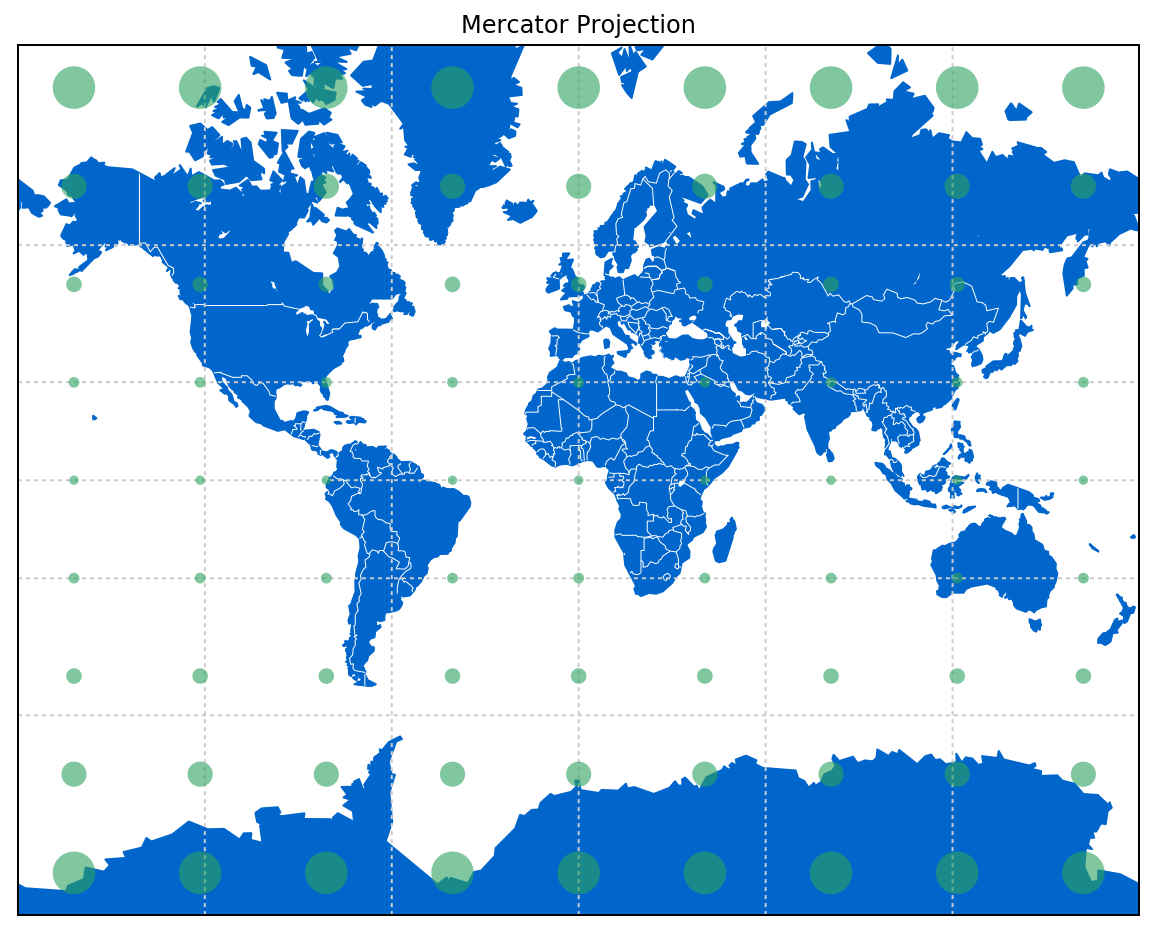

In [2]:
plt.figure(figsize=(16,8))

# Create a Basemap instance that uses the mercator projection
m = Basemap(projection='merc',
            urcrnrlat=80, llcrnrlat=-80,      # Top and Bottom parallels
            llcrnrlon=-180, urcrnrlon=180)    # Left and Right meridians

# Draw the coastlines and fill the continents all with the same blue.
# The color of inland lakes defaults to the background color of the 
# axis, but we'll set the lake_color here to make sure that it is white.
m.drawcoastlines(color='#0066CC')
m.fillcontinents(color='#0066CC', lake_color='white')

# Draw the boundaries of each country in white
m.drawcountries(color='white')

# Draw lines of latitude (parallels) and longitude (meridians)
m.drawparallels(range(-90,91,30), color='#CCCCCC')
m.drawmeridians(range(-180,181,60), color='#CCCCCC')

# Draws the bounding box around the map and sets the background 
# color (fill_color) for the entire map. 
m.drawmapboundary(fill_color='white')

# Give the map a title
plt.title("Mercator Projection")

# draw tissot's indicatrix to show distortion.
for y in np.linspace(m.ymax/20, 19*m.ymax/20, 9):
    for x in np.linspace(m.xmax/20, 19*m.xmax/20, 9):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon, lat, 1.5, 100, facecolor='#2ca25f', zorder=10, alpha=0.6);

### The True Size of Africa

The map above uses a tool that was first developed by the French mathematician Nicolas Auguste Tissot in 1859 to show the distortion at different points in a map due to the projection method used. The tool, appropriately named [Tissot's Indicatrix][1] (plural: "indicatrices"), uses ellipses scattered throughout the map to show the amount and direction of the distortion at those points. 

[1]: http://blogs.esri.com/esri/arcgis/2011/03/24/tissot-s-indicatrix-helps-illustrate-map-projection-distortion/

The Mercator projection uses a method that preserves the relative angles in the map, so the ellipses here are perfect circles. Where we see a difference though is in the size of the circles. Notice how the indicatrices near the center of the map, and those over Africa, are drastically smaller than those over top of Greenland, for example. This should give you some idea of the amount of size distortion the mercator projection inflicts upon the countries in the northern part of the world.

While Tissot's Indicatrices are a nice visual representation of the distortion in a map, to really get a feel for just how much a projection method like the Mercator projection can distort the objects within it, take a look at this wonderful visualization from [Kai Krause][2] entitled ["The True Size of Africa"][3].

[2]: http://kai.sub.blue/
[3]: http://kai.sub.blue/en/africa.html

<figure>
  <img src="./images/True-Size-of-Africa-kk-v3.png" alt="The True Size of Africa">
  <figcaption style="text-align:center;padding-top:10px">"The True Size of Africa" By <a href="http://kai.sub.blue/">Kai Krause</a></figcaption>
</figure>

Looking at Kai's visualization, it's easy to see just how massive Africa is. Looking at the mercator projection above, however, it looks to be roughly the same size as Greenland, when in reality, it's actually **14 times larger!**

## Conclusion

In this lesson, we covered the major issue with the creation of maps. Specifically, a 3-dimensional object can never be accurately portrayed on a 2-dimensional, flat surface. This has led cartographers over the years to create a multitude of map projection methods, each with its own set of pros and cons. As a result, choosing the right projection for the type of data that your trying to display can be extremely challenging, and as much an art as a science in many cases. 

This lesson has just scratched the surface of this topic, and while going any deeper is definitely out of scope for this course, I do hope that I've piqued your interest enough to investigate the topic a bit further, because frankly, it is a truly fascinating subject. 